In [1]:
import pandas as pd
import os
pd.options.mode.chained_assignment = None #SettingWithCopyWarning

## Read several CSV files 

In [2]:
files = [file for file in os.listdir('./real world data science tasks with Python Pandas/Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


# Data preprocessing

## Merge all CSV to one CSV file

In [3]:
all_months_data = pd.DataFrame()
for file in files:
    df=pd.read_csv('./real world data science tasks with Python Pandas/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv',index=False)

## Read new Data Set  (CSV)

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Data Cleaning

### Remove Null rows

In [5]:
#check wat are the null values

all_data.isnull().head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [6]:
df_cleaned = all_data.dropna()
df_cleaned.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add new colum for months (first 2 digit from date)

In [7]:
#there is a string value ('or') in month column. so we need to find and remove it
df_cleaned = df_cleaned[df_cleaned['Order Date'].str[0:2]!= "Or"]


In [8]:
df_cleaned['Month'] =df_cleaned['Order Date'].str[0:2]
data = df_cleaned
data['Month'] = data['Month'].astype('int32')
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


### Remove Str values from Quantity Ordered and Price Each

In [9]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

### Add sales column (orders * Price)

In [10]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


## What is the best Sales month and erning from this month?

In [11]:
results = data.groupby('Month').sum()

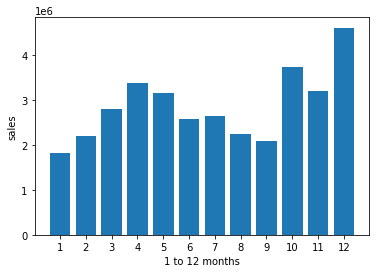

In [12]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['Sales'])

plt.xticks(months)
plt.ylabel('sales')
plt.xlabel('1 to 12 months')

plt.show()

## what state had the highest number of sales?

In [13]:
#create new column with city
data['State'] = data['Purchase Address'].str.split(',').str[1].str.strip()
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [14]:
state_result = data.groupby('State').sum()
state_result

,Quantity Ordered,Price Each,Month,Sales
State,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


In [15]:
#get city and zip code(city)
#create new column with city
data['city'] = data['Purchase Address'].str.split(',').str[2].str.strip()
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


In [16]:
data['State_and_city'] = data['State'] + ', ' + data['city'].str[0:2]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA"


In [17]:
state_and_city_result = data.groupby('State_and_city').sum()

state_and_city_result

,Quantity Ordered,Price Each,Month,Sales
State_and_city,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


Text(0.5, 1.0, 'Sales by State and City')

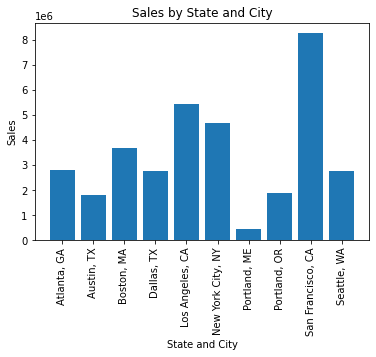

In [18]:
import matplotlib.pyplot as plt
plt.bar(state_and_city_result.index, state_and_city_result['Sales']) # use index becaus when group data there dosenot create that groupby column


plt.xticks(rotation=90)

plt.xlabel('State and City')
plt.ylabel('Sales')
plt.title('Sales by State and City')

## what time should we dispaly ads to maximize likehood of customers's buying product ?

In [19]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA"


In [20]:
#convert Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA"


In [21]:
#get hour and minutes from Order Date
data['hour']=data['Order Date'].dt.hour
data['minutes']=data['Order Date'].dt.minute
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city,hour,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA",22,30


In [22]:
#merge hour and minutes
data['time'] = data['hour'].astype(str) + ':' + data['minutes'].astype(str)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city,hour,minutes,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX",8,46,8:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA",22,30,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",9,27,9:27


In [23]:
best_time = data.groupby('time').sum()
best_time.head()

,Quantity Ordered,Price Each,Month,Sales,hour,minutes
time,,,,,,
0:0,91,22450.44,584,22488.86,0,0
0:1,73,12772.26,459,12814.95,0,65
0:10,106,14933.03,643,15135.58,0,920
0:11,78,11793.71,503,11809.51,0,803
0:12,73,6981.86,439,7044.21,0,780


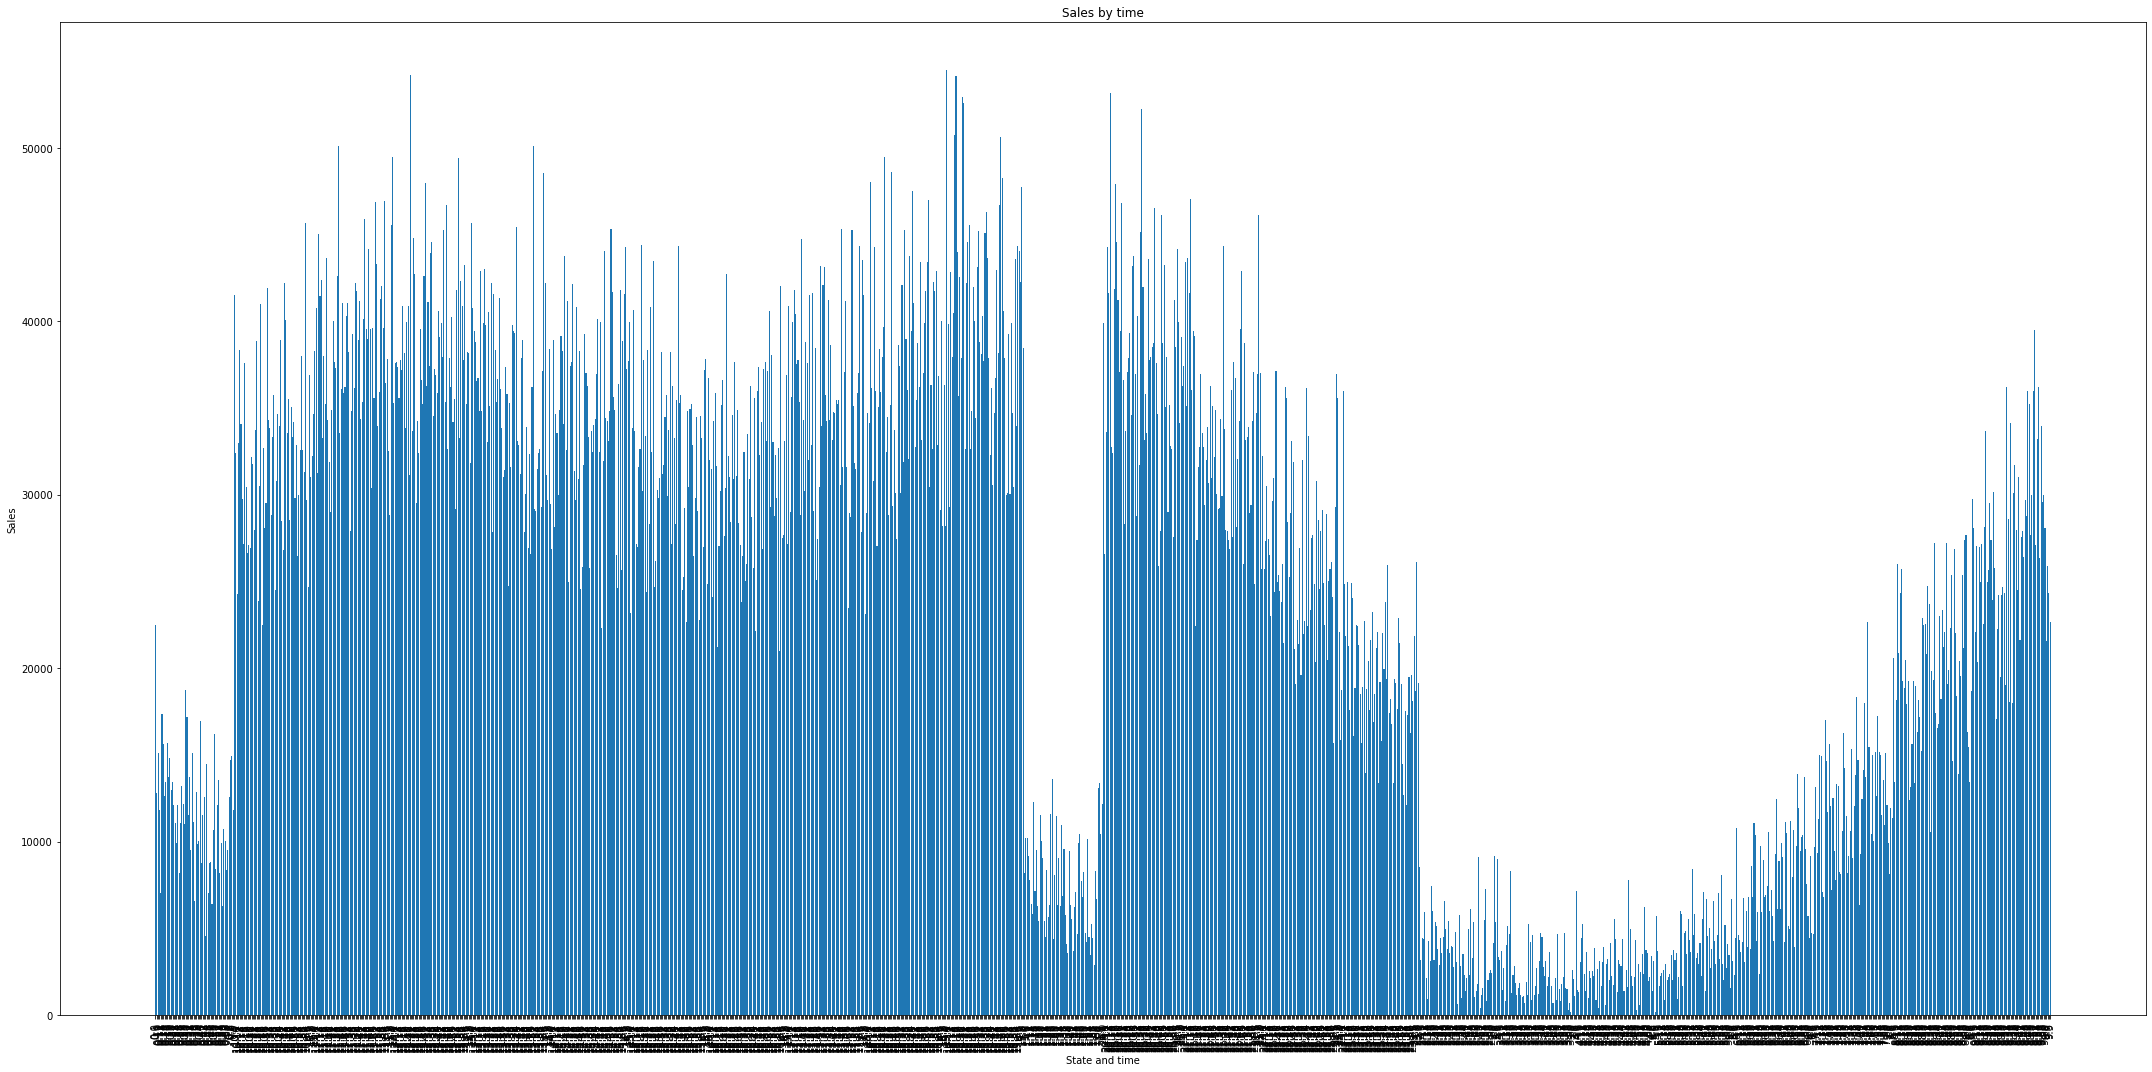

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
plt.bar(best_time.index, best_time['Sales']) # use index becaus when group data there dosenot create that groupby column


plt.xticks(rotation='vertical')

plt.xlabel('State and time')
plt.ylabel('Sales')
plt.title('Sales by time')
plt.tight_layout()
plt.show()

##### find time by hour

In [25]:
best_hour = data.groupby('hour').sum()
best_hour.head()

,Quantity Ordered,Price Each,Month,Sales,minutes
hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876


Text(0.5, 1.0, 'Sales by hour')

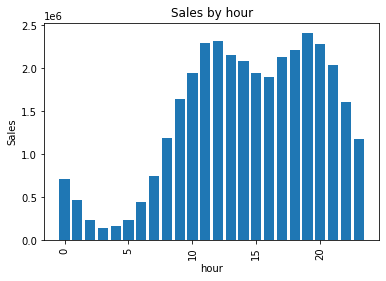

In [26]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(30, 15))
plt.bar(best_hour.index, best_hour['Sales']) # use index becaus when group data there dosenot create that groupby column


plt.xticks(rotation='vertical')

plt.xlabel('hour')
plt.ylabel('Sales')
plt.title('Sales by hour')

Text(0.5, 1.0, 'Sales by Hour')

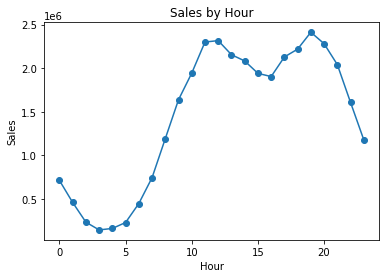

In [27]:
plt.plot(best_hour.index, best_hour['Sales'],marker='o',linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Sales by Hour')

## what products are most often sold together?

In [28]:
data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city,hour,minutes,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX",8,46,8:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA",22,30,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",9,27,9:27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,CA 94016,"San Francisco, CA",13,3,13:3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,WA 98101,"Seattle, WA",7,46,7:46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,GA 30301,"Atlanta, GA",10,58,10:58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,CA 94016,"San Francisco, CA",10,38,10:38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston,MA 02215,"Boston, MA",14,5,14:5


In [29]:
#find duplicate Order IDs
orders = data[data['Order ID'].duplicated(keep=False)]
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city,hour,minutes,time
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",19,42,19:42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA 90001,"Los Angeles, CA",19,42,19:42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA",11,31,11:31


In [30]:
#gropu duplicate orders(by Product)
orders['grouped']= orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city,hour,minutes,time,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",19,42,19:42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA 90001,"Los Angeles, CA",19,42,19:42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA",11,31,11:31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [31]:
#remove duplicate orders
orders = orders[['Order ID','grouped']].drop_duplicates()
orders.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
#count most sold pairs
from itertools import combinations
from collections import Counter

count = Counter()

for row in orders['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, Value in count.most_common(10):
    print(key,Value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What Product sold the most? and why?

In [33]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,city,State_and_city,hour,minutes,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,"Dallas, TX",8,46,8:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,"Boston, MA",22,30,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",14,38,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,"Los Angeles, CA",9,27,9:27


In [39]:
best_product = data.groupby('Product')
best_product = best_product.sum()
best_product.head()

,Quantity Ordered,Price Each,Month,Sales,hour,minutes
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039


Text(0, 0.5, 'Quantity Ordered')

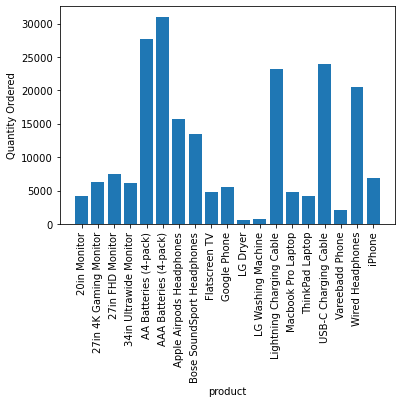

In [41]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(30, 15))
plt.bar(best_product.index, best_product['Quantity Ordered']) # use index becaus when group data there dosenot create that groupby column


plt.xticks(rotation='vertical')
plt.xlabel('product')
plt.ylabel('Quantity Ordered')



In [48]:
price = data.groupby('Product').mean()['Price Each']
price_df = pd.DataFrame({'Product': price.index, 'Price Each': price.values})
price_df

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


Text(0, 0.5, 'Price Each')

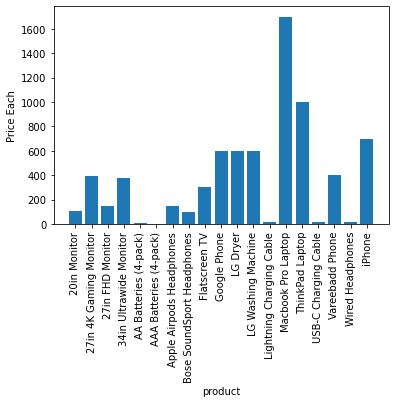

In [56]:
import matplotlib.pyplot as plt

plt.bar(price_df['Product'], price_df['Price Each']) # use index becaus when group data there dosenot create that groupby column


plt.xticks(rotation='vertical')
plt.xlabel('product')
plt.ylabel('Price Each')

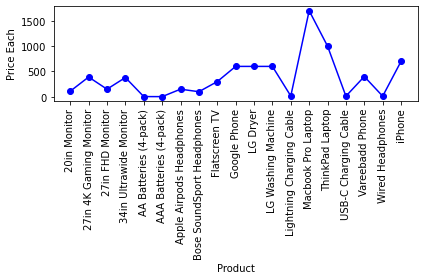

In [63]:
import matplotlib.pyplot as plt

plt.plot(price_df['Product'], price_df['Price Each'], marker='o', linestyle='-', color='b')  # Line chart

plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Price Each')

plt.tight_layout()  # Optional for better layout

plt.show()

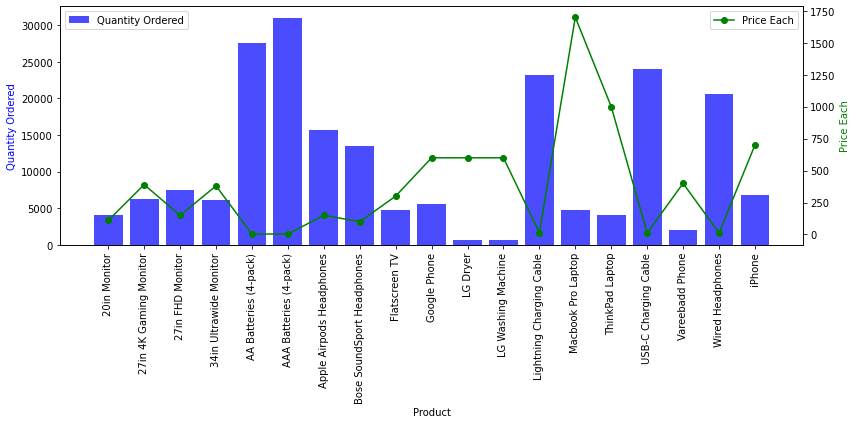

In [74]:
fig, ax1 = plt.subplots (figsize=(12, 6))


ax1.bar(best_product.index, best_product['Quantity Ordered'], label='Quantity Ordered', alpha=0.7, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='b')
#ax1.set_xticklabels(Product,rotation='vertical',size=8)
plt.xticks(rotation='vertical')
ax2 = ax1.twinx()
ax2.plot(price_df['Product'], price_df['Price Each'], label='Price Each', marker='o', linestyle='-', color='g')
ax2.set_ylabel('Price Each', color='g')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()